### =============USRP B210 Testing Scripts =============
Author: Kai-Ting Ting <br>
Email: k.ting@northeastern.edu <br>
Date: 01-01-2025 (last update) <br>

#### Application Notes

1) This script is designed to run when the USRP B210 is connected to the host PC. <br>
2) customized installation of uhd package is required before running this scripts
2) If master clock rate is changed, all time-synchronization will be lost! <br>
$\rightarrow$ good to setup at the beginning and avoid any change afterward

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import sys
import tqdm
import uhd
import os

In [2]:
### change directory to the working folder (.../code)
code_dir = os.getcwd()
parent_dir = os.path.dirname(code_dir)
figs_dir = os.path.join(parent_dir, 'figures')
funs_dir = os.path.join(parent_dir, 'functions')
data_dir = os.path.join(parent_dir, 'data')

if not os.path.exists(figs_dir):
    os.makedirs(figs_dir)
if not os.path.exists(funs_dir):
    os.makedirs(funs_dir)
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
       
print(parent_dir)

/home/kaiting/Documents/USRPB210/Python_script/UHD_test


In [3]:
### Testinng Connection of USRP B210 (type is B200)
try:
    my_usrp= uhd.usrp.MultiUSRP("type=b200")  # no device present
    # print("USRP device created:", my_usrp.get_pp_string())
    print("USRP device created")
except Exception as e_usrp:
    print("Failure (no device):", type(e_usrp).__name__)
    print(e_usrp)

USRP device created


[INFO] [UHD] linux; GNU C++ version 13.3.0; Boost_108300; UHD_4.9.0.0-0-unknown
[INFO] [B200] Detected Device: B210
[INFO] [B200] Operating over USB 3.
[INFO] [B200] Initialize CODEC control...
[INFO] [B200] Initialize Radio control...
[INFO] [B200] Performing register loopback test... 
[INFO] [B200] Register loopback test passed
[INFO] [B200] Performing register loopback test... 
[INFO] [B200] Register loopback test passed
[INFO] [B200] Setting master clock rate selection to 'automatic'.
[INFO] [B200] Asking for clock rate 16.000000 MHz... 
[INFO] [B200] Actually got clock rate 16.000000 MHz.


In [4]:
### Change/setup a desired clock frequency (default is 16 MHz)
my_usrp.set_master_clock_rate(16e6)
print(f"The master clock rate is set to {my_usrp.get_master_clock_rate():.1f} Hz.")

The master clock rate is set to 16000000.0 Hz.


[INFO] [MULTI_USRP] Setting master clock rate selection to 'manual'.
[INFO] [B200] Asking for clock rate 16.000000 MHz... 
[INFO] [B200] OK


In [5]:
### Set a receiver gain
my_usrp.set_rx_gain(0) ## in dB
print(f"The RX gain is set to {my_usrp.get_rx_gain():.1f} dB.")

The RX gain is set to 0.0 dB.


In [6]:
def recv_to_file(samp_rate,num_samps):
    """RX samples and write to file"""
    my_usrp = uhd.usrp.MultiUSRP("type=b200")

    raw_data = my_usrp.recv_num_samps(
        num_samps, # Number of samples
        int(2.4e9), # Frequency in Hz
        samp_rate, # Sampling rate
        [0], # Receive on channel 0
        80, # 80 dB of RX gain
    )

    if not os.path.exists(data_dir+"/tests"):
        os.makedirs(data_dir+"/tests")

    raw_data.tofile(data_dir+f"/tests/samples_data_{num_samps:.0f}points.dat")

    return num_samps, raw_data

In [7]:
### Testing the data acquisition function
num_samps = int(1e6)
samp_rate = int(1e6)
raw_data = recv_to_file(samp_rate,num_samps)
samps_data = np.ravel(raw_data[1])
time_arr = np.arange(0, num_samps) / samp_rate

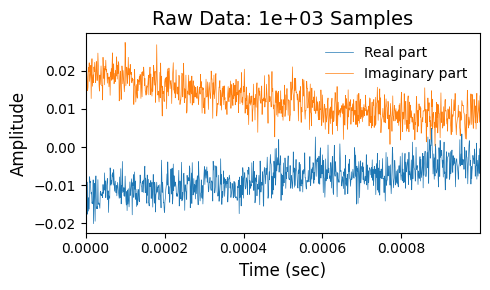

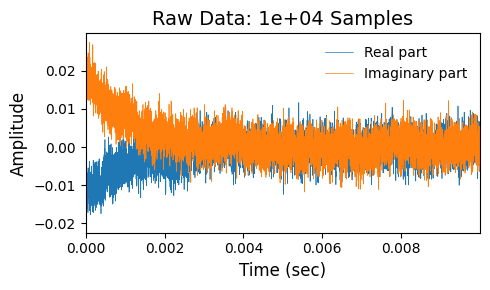

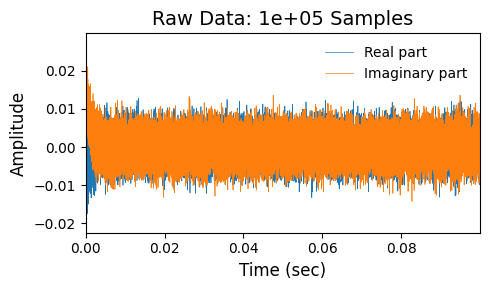

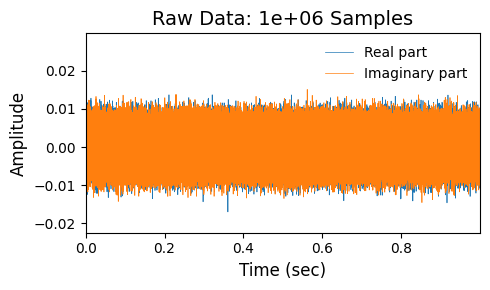

In [ ]:
### figure: Raw data (for first n_show samples)

# n_show = 1000000

# for n_show in [1000, 10000, 100000, 1000000]:
for n_show in [2000, 20000, 200000]:

    fig,ax = plt.subplots(figsize=(5,3))
    ax.plot(time_arr[:n_show],np.real(samps_data[:n_show]), linewidth=0.5, label='Real part')
    ax.plot(time_arr[:n_show],np.imag(samps_data[:n_show]), linewidth=0.5, label='Imaginary part')
    ax.set_title(f"Raw Data: {n_show:.0e} Samples",fontsize=14)
    ax.set_xbound(0, time_arr[n_show-1])
    ax.set_xlabel('Time (sec)',fontsize=12)
    ax.set_ylabel('Amplitude',fontsize=12)
    ax.legend(frameon=False, fontsize=10, loc="best")
    plt.tight_layout()

    fig1_path = figs_dir + '/raw_data'
    if not os.path.exists(fig1_path):
        os.makedirs(fig1_path)

    plt.savefig(fig1_path+f"/rawdata_first_{n_show:.0f}_samples.pdf", dpi=100, bbox_inches='tight')

In [9]:
### Explore the USRP object methods related to "rx"
print(f"The object methods related to 'rx' are: \n {[m for m in dir(my_usrp) if "rx" in m.lower()][:50]}")

The object methods related to 'rx' are: 
 ['get_fe_rx_freq_range', 'get_normalized_rx_gain', 'get_rx_antenna', 'get_rx_antennas', 'get_rx_bandwidth', 'get_rx_bandwidth_range', 'get_rx_dboard_iface', 'get_rx_filter', 'get_rx_filter_names', 'get_rx_freq', 'get_rx_freq_range', 'get_rx_gain', 'get_rx_gain_names', 'get_rx_gain_profile', 'get_rx_gain_profile_names', 'get_rx_gain_range', 'get_rx_lo_export_enabled', 'get_rx_lo_freq', 'get_rx_lo_freq_range', 'get_rx_lo_names', 'get_rx_lo_source', 'get_rx_lo_sources', 'get_rx_num_channels', 'get_rx_power_range', 'get_rx_power_reference', 'get_rx_rate', 'get_rx_rates', 'get_rx_sensor', 'get_rx_sensor_names', 'get_rx_stream', 'get_rx_subdev_name', 'get_rx_subdev_spec', 'get_usrp_rx_info', 'has_rx_power_reference', 'set_normalized_rx_gain', 'set_rx_agc', 'set_rx_antenna', 'set_rx_bandwidth', 'set_rx_dc_offset', 'set_rx_filter', 'set_rx_freq', 'set_rx_gain', 'set_rx_gain_profile', 'set_rx_iq_balance', 'set_rx_lo_export_enabled', 'set_rx_lo_freq', 's

In [10]:
### Call out help function for a specific method
help(my_usrp.set_clock_source)

Help on method set_clock_source in module uhd.libpyuhd.usrp:

set_clock_source(...) method of uhd.usrp.multi_usrp.MultiUSRP instance
    set_clock_source(self: uhd.libpyuhd.usrp.multi_usrp, source: str, mboard: int = 18446744073709551615) -> None



In [ ]:
### Print out sensor names and antenna names
sensor_names = my_usrp.get_mboard_sensor_names()
print(f"The sensor names are: "+ f"{sensor_names}")
antenna_names = my_usrp.get_rx_antenna()
print(f"The antenna names are: "+ f"{antenna_names}")

The sensor names are: ['ref_locked']
The antenna names are: RX2


[ERROR] [UHD] An unexpected exception was caught in a task loop.The task loop will now exit, things may not work.EnvironmentError: IOError: usb rx8 transfer status: LIBUSB_TRANSFER_NO_DEVICE
